In [4]:
import numpy as np 
import tensorflow as tf 
import os
import matplotlib.pyplot as plt

# Ensure TensorFlow doesn't use too much memory
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [5]:
# Define paths to the dataset
train_dir = "C:\\Users\\thesh\\Downloads\\archive (1) 2\\chest_xray\\train"
val_dir = "C:\\Users\\thesh\\Downloads\\archive (1) 2\\chest_xray\\val"
test_dir = "C:\\Users\\thesh\\Downloads\\archive (1) 2\\chest_xray\\test"

# Set image parameters
img_height = 128
img_width = 128
batch_size = 32

# Load datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    color_mode='grayscale',
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    color_mode='grayscale',
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    color_mode='grayscale',
    image_size=(img_height, img_width),
    batch_size=batch_size,
)


Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


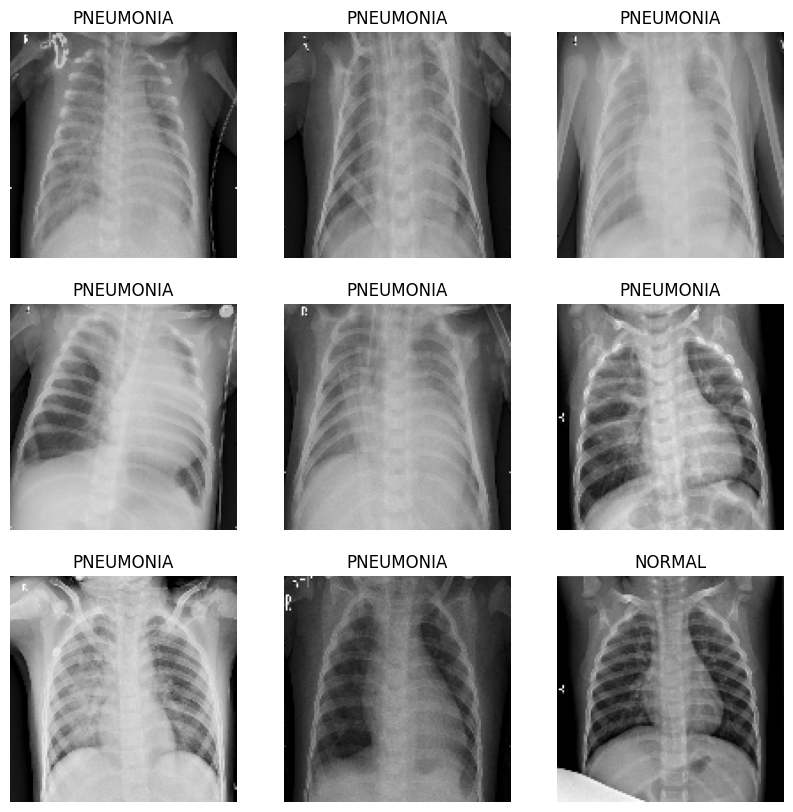

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(np.squeeze(images[i].numpy().astype("uint8")), cmap='gray')
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")
plt.show()


In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss=tf.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy']
)


c:\Users\thesh\miniconda3\envs\ml_env\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
epochs = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 46s 261ms/step - accuracy: 0.8559 - loss: 0.3438 - val_accuracy: 0.6875 - val_loss: 0.5636
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 35s 216ms/step - accuracy: 0.9640 - loss: 0.0980 - val_accuracy: 0.8125 - val_loss: 0.2949
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 35s 215ms/step - accuracy: 0.9660 - loss: 0.0849 - val_accuracy: 0.9375 - val_loss: 0.1662
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 35s 214ms/step - accuracy: 0.9739 - loss: 0.0690 - val_accuracy: 0.8125 - val_loss: 0.5632
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 36s 220ms/step - accuracy: 0.9796 - loss: 0.0598 - val_accuracy: 0.6250 - val_loss: 1.5489
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 37s 223ms/step - accuracy: 0.9764 - loss: 0.0706 - val_accuracy: 0.8125 - val_loss: 0.4704
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 36s 221ms/step - accuracy: 0.9826 - loss: 0.0454 - val_accuracy: 0.7500 - val_loss: 0.5467
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 37s 224ms/step - accuracy: 0.9878 - loss: 0

In [9]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.2f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.7554 - loss: 1.5475
Test Accuracy: 0.76


In [16]:
from tensorflow.keras.saving import save_model

save_model(model, "pneumonia_detection_model.keras")


In [17]:
# Save the model as a .keras file (or .h5 file)
model.save('pneumonia_detection_model.keras')


In [18]:
import os

# Check if the file exists
model_file_path = 'C:\\Users\\thesh\\OneDrive\\Desktop\\jupyter\\pneumonia_detection_model.keras'
print(os.path.isfile(model_file_path))


True
